**Significado de los headers.**  
**Age**: edad.  
**workclass**: tipo de empleo.  
**FNLWGT**: importancia relativa de cada observación.  
**Education**: nivel de estudios.  
**Education-Num**: años de estudios.  
**Marital-Status**: estado civil.  
**Occupation**: sector de trabajo.  
**Relationship**: estado familiar.  
**Race**: raza.  
**Sex**: género.  
**Capital-Gain**: ganancia de capital.  
**Capital-Loss**: perdidas de capital.  
**Hours-Per-Week**: horas de trabajo semanal.  
**Native-Country**: país de origen.  
**Salario**: si el salario supera o no 50000 dólares anuales.  

### Cargar el dataset suministrado: census.data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pip install squarify
import squarify as sq
%pip install scikit-learn 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as kn
filename = 'census.data'
data = pd.read_csv(filename, header=None)
data.columns=["Age","Workclass","FNLWGT","Education","Education-Num","Marital-Status","Occupation","Relationship","Race","Sex","Capital-Gain","Capital-Loss","Hours-Per-Week","Native-country","Salary"]
data = data.replace(to_replace=" ?", value=np.nan)
data

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,Age,Workclass,FNLWGT,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Presente de forma resumida la información de cada uno de los atributos del dataset. La información debe ser presentada por gráficos tipo EDA, acompañado de su corta y clara descripción de cada una.

<AxesSubplot:ylabel='Density'>

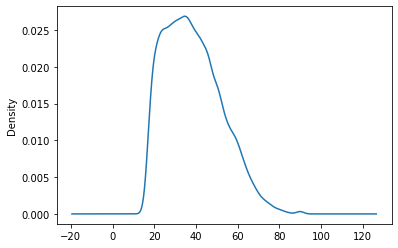

In [2]:
data.loc[:,"Age"].plot.density()

En la grafica de la edad podemos encontrar que su densidad se encuentra entre 17 años aproximadmente, hasta 80 aprox. (Con algun par de datos sueltos)

<AxesSubplot:ylabel='Workclass'>

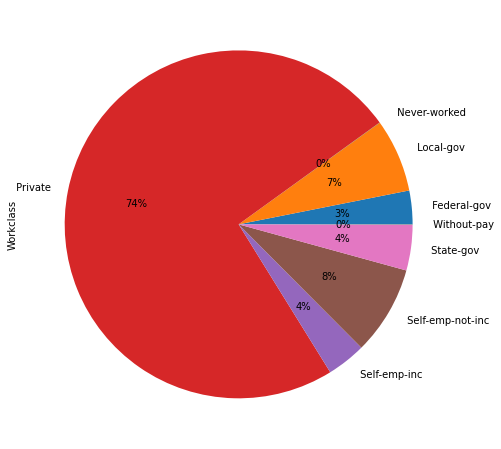

In [3]:
data_workclass=data.groupby("Workclass")["Workclass"].count()
data_workclass.plot.pie(figsize=(8,8), autopct="%1.0f%%")

Tras ver esta grafica nos damos cuenta que la mayoria de clases de trabajo son privados

<AxesSubplot:ylabel='Density'>

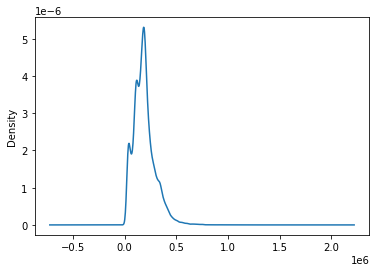

In [4]:
data.loc[:,"FNLWGT"].plot.density()

Este indicador se encuentra en un rango similar.

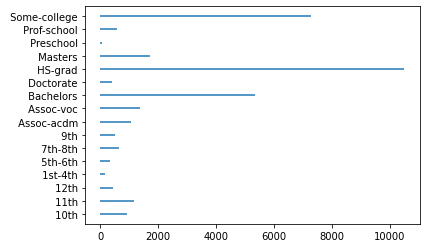

In [5]:
education_data = data.groupby("Education")["Education"].count()
plt.hlines(xmin=0,y=education_data.index,xmax=education_data.iloc[0:])

En esta grafica tenemos los diferentes grados de educacion de los encuestados.

<AxesSubplot:ylabel='Education-Num'>

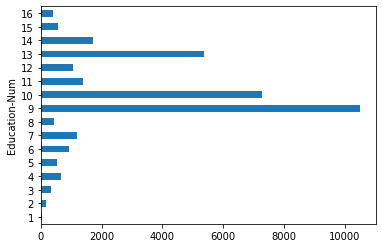

In [6]:
data.groupby("Education-Num")["Education-Num"].count().plot.barh()

En este grafico encontramos la clasificacion por el numero de años de educacion. Nos damos una tendencia hacia 9 años.

<AxesSubplot:ylabel='Marital-Status'>

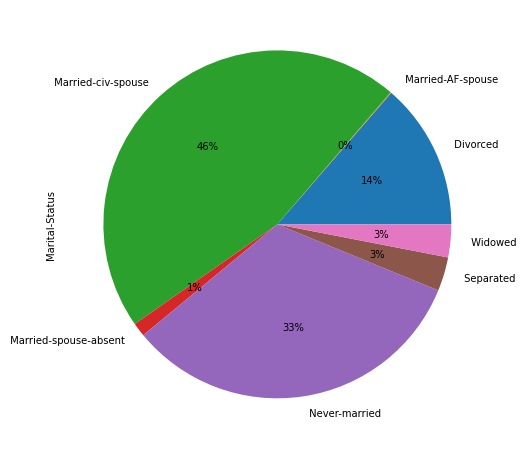

In [7]:
data.groupby("Marital-Status")["Marital-Status"].count().plot.pie(figsize=(8,8), autopct="%1.0f%%")

Gran porcentaje nunca se ha casado o estan casados.

<AxesSubplot:ylabel='Occupation'>

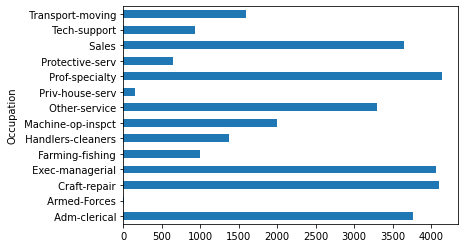

In [8]:
data.groupby("Occupation")["Occupation"].count().plot.barh()

Grafica que nos da informacion al respecto del trabajo de los encuestados.

<AxesSubplot:>

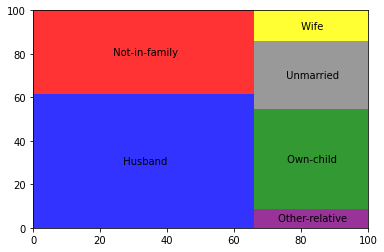

In [9]:
relationship_data=data.groupby("Relationship")["Relationship"].count()
sq.plot(relationship_data,alpha=.8,label=relationship_data.index,color=["blue","red","purple","green","grey","yellow"])

Grafico que nos muestra el espacio que ocupa cada una de las relaciones de los encuestados.

<AxesSubplot:ylabel='Race'>

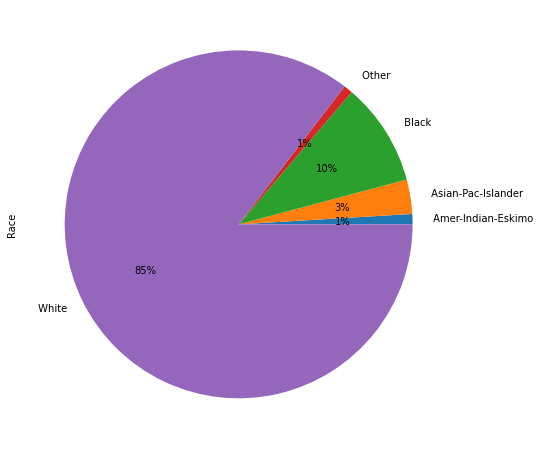

In [10]:
data.groupby("Race")["Race"].count().plot.pie(figsize=(8,8), autopct="%1.0f%%")

Clasificacion racial del dataset, vemos una tendencia a los blancos.

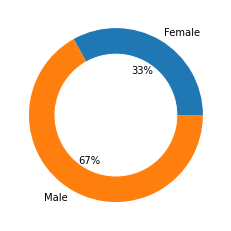

In [11]:
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(data.groupby("Sex")["Sex"].count(),labels=["Female","Male"],autopct="%1.0f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)

Clasificacion de sexo en el dataset.

<AxesSubplot:xlabel='Capital-Gain'>

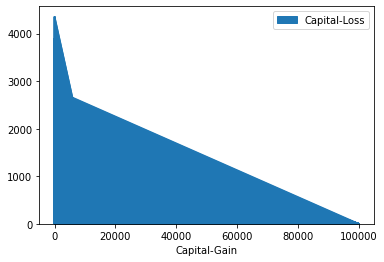

In [12]:
data.plot.area(x="Capital-Gain",y="Capital-Loss")

Diagrama de area que nos compara el capital perdido con el ganado.

<AxesSubplot:ylabel='Frequency'>

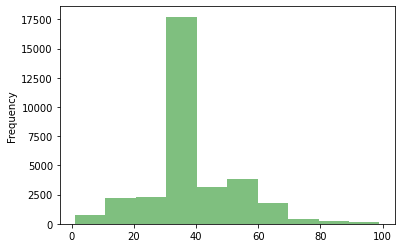

In [13]:
data.loc[:,"Hours-Per-Week"].plot.hist(bins=10, alpha=0.5,color="green")

Histograma de las horas trabajadas. Vemos una tendencia entre las 30 y 40 horas.

<AxesSubplot:xlabel='Native-country'>

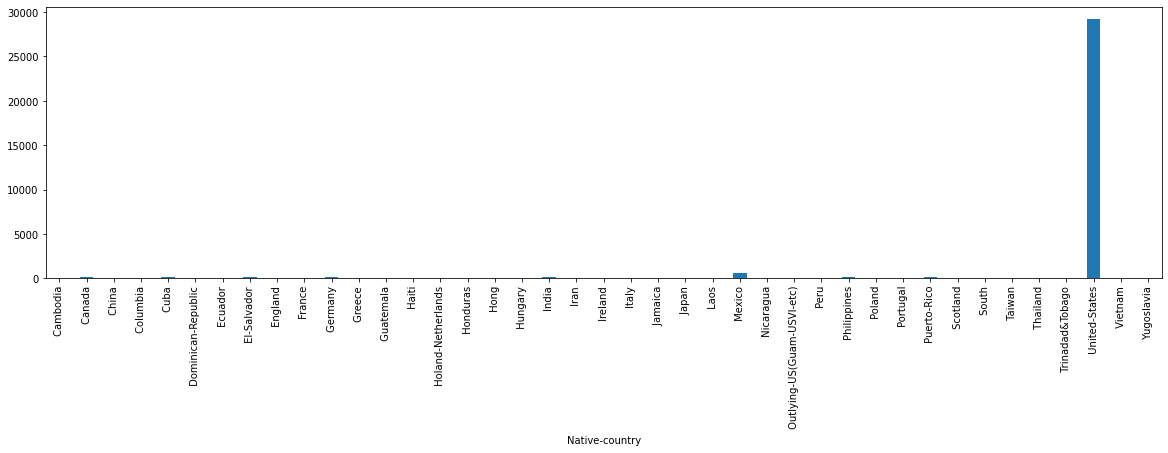

In [14]:
data.groupby("Native-country")["Native-country"].count().plot.bar(figsize=(20,5))

Clasificacion de los paises nativos de los encuestados.

Salary
 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

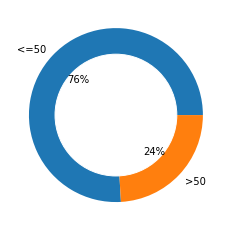

In [15]:
my_circle2 = plt.Circle( (0,0), 0.7, color='white')
plt.pie(data.groupby("Salary")["Salary"].count(),labels=["<=50",">50"],autopct="%1.0f%%")
g = plt.gcf()
g.gca().add_artist(my_circle2)
data.groupby("Salary")["Salary"].count()

Clasificacion del salario anual.

### Valide si alguno de los atributos tiene valores faltantes. Indique por variable el porcentaje de valores faltantes y teóricamente qué tan crítico puede ser esto para posteriores análisis.


In [16]:
faltante =((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)
print(faltante)

Age               0.00
Workclass         5.64
FNLWGT            0.00
Education         0.00
Education-Num     0.00
Marital-Status    0.00
Occupation        5.66
Relationship      0.00
Race              0.00
Sex               0.00
Capital-Gain      0.00
Capital-Loss      0.00
Hours-Per-Week    0.00
Native-country    1.79
Salary            0.00
dtype: float64


Tras analizar los valores, y teniendo en cuenta que hay 32561, los procentajes de datos faltantes no son muy criticos.

Codigo copiado de: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

### Para cada una de las variables con valores faltantes, calcule los valores estadísticos más significativos (Mean, Mode, Median, Quartiles,...), también puede hacer uso de algún gráfico.

In [17]:
data.describe()

,Age,FNLWGT,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Aplique dos métodos de imputación (sin eliminar registros) sobre los atributos que tienen valores faltantes, acá conseguirá dos nuevos datasets imputados: CensusImp1 y CensusImp2, además, del dataset original: Census.

- CensusImp1 (Dada la moda se imputa el valor. Codigo copiado de https://elmundodelosdatos.com/identificacion-valores-perdidos-python/)

In [18]:
CensusImp1 = data.copy()
CensusImp1['Workclass'] = CensusImp1['Workclass'].replace(np.nan,(data['Workclass'].mode())[0])
CensusImp1['Occupation'] = CensusImp1['Occupation'].replace(np.nan,(data['Occupation'].mode())[0])
CensusImp1['Native-country'] = CensusImp1['Native-country'].replace(np.nan,(data['Native-country'].mode())[0])
faltante1 =((CensusImp1.isnull() | CensusImp1.isna()).sum() * 100 / CensusImp1.index.size).round(2)
print(faltante1)

Age               0.0
Workclass         0.0
FNLWGT            0.0
Education         0.0
Education-Num     0.0
Marital-Status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital-Gain      0.0
Capital-Loss      0.0
Hours-Per-Week    0.0
Native-country    0.0
Salary            0.0
dtype: float64


- CensusImp2 (Dada las graficas, se imputa un valor constante)

In [19]:
CensusImp2 = data.copy()
CensusImp2['Workclass'] = CensusImp2['Workclass'].replace(np.nan,'Private')
CensusImp2['Occupation'] = CensusImp2['Occupation'].replace(np.nan,'Prof-specialty')
CensusImp2['Native-country'] = CensusImp2['Native-country'].replace(np.nan,'United-States')
faltante2 =((CensusImp2.isnull() | CensusImp2.isna()).sum() * 100 / CensusImp2.index.size).round(2)
print(faltante2)

Age               0.0
Workclass         0.0
FNLWGT            0.0
Education         0.0
Education-Num     0.0
Marital-Status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital-Gain      0.0
Capital-Loss      0.0
Hours-Per-Week    0.0
Native-country    0.0
Salary            0.0
dtype: float64


### Para los atributos imputados sobre CensusImp1 y CensusImp2 calcule por separado los valores estadísticos más significativos (Mean, Mode, Median, Quartiles,...).

- CensusImp1

In [20]:
CensusImp1.describe()


,Age,FNLWGT,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- CensusImp2

In [21]:
CensusImp2.describe()

,Age,FNLWGT,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### De forma clara y precisa escriba su interpretación sobre el impacto de la imputación a partir del análisis de los valores estadísticos en los tres data sets: Census (paso 4), CensusImp1 y CensusImp2 (paso 6). ¿Cuál método de imputación elige para este problema?


1. El dataset Census al ser el original, resulta más acertado, debido a que sin importar sus valores Nan, estos no nosafectaran debido a que las funciones solo usarán los datos diferentes a Nan. (Top 1)

2. El dataset CensusImp1, aunque resulta efectivo, puede cambiar resultados graficas puesto que altera su frecuencia. (Top 2)

3. El dataset CensusImp2, al ser el dataset que se modifica a "ojo" me resulta el menos efecto. (Top 3)

### A partir del dataset elegido en el numeral anterior entre CensusImp1 o CensusImp2. Identifique relaciones entre algunos atributos y el ingreso de cada individuo (Salary mayor o menor que 50K)


### Importante, en cada gráfico hacer una interpretación sobre lo visualizado, además del gráfico, es importante la respectiva interpretación a cada uno, es decir, qué dice o revela el gráfico?

<AxesSubplot:title={'center':'Education-Num'}, xlabel='Salary'>

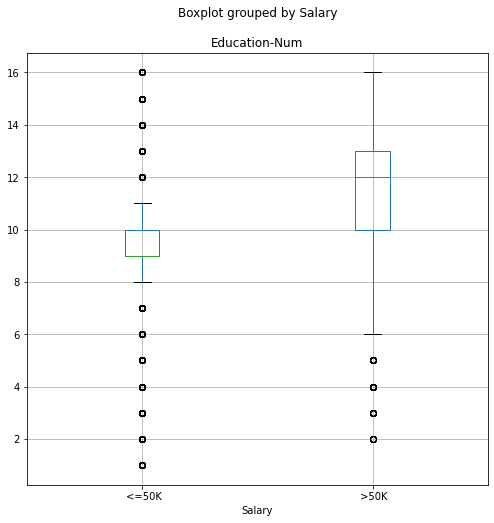

In [22]:
CensusImp1.boxplot(column='Education-Num', by='Salary',figsize=(8,8))

<AxesSubplot:title={'center':'Age'}, xlabel='Salary'>

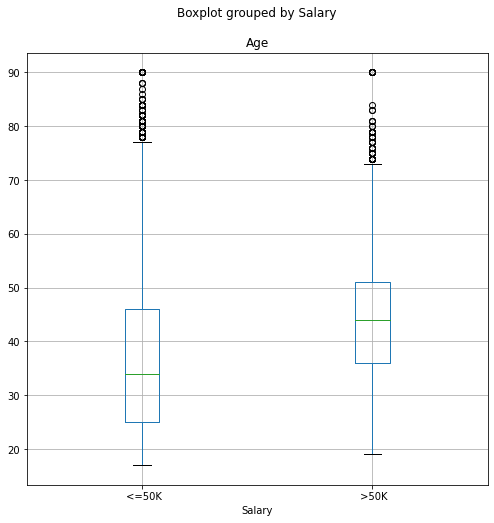

In [23]:
CensusImp1.boxplot(column='Age', by='Salary',figsize=(8,8))

<AxesSubplot:xlabel='Education'>

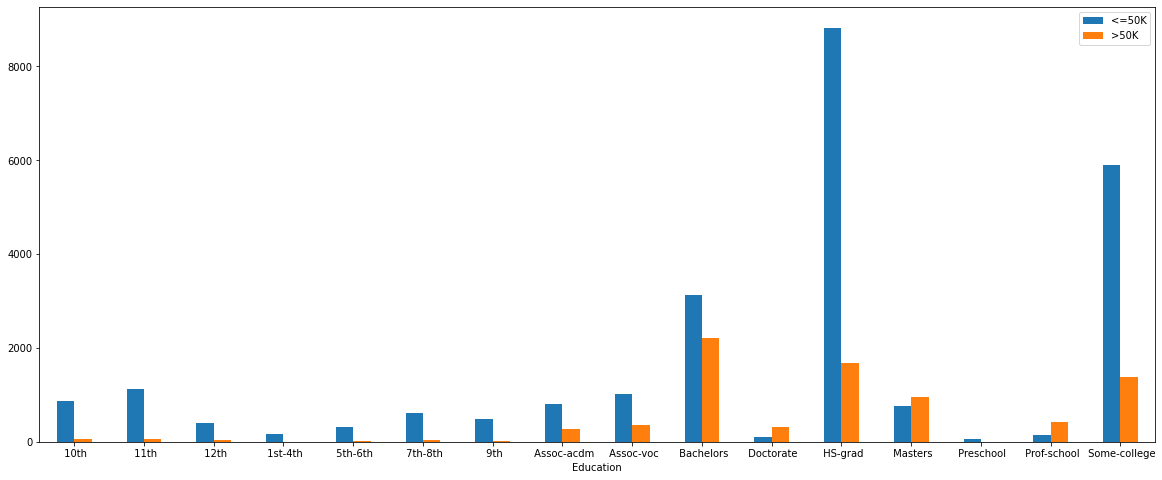

In [24]:
salaryVSEducation=pd.DataFrame([CensusImp1[CensusImp1["Salary"] == " <=50K"].groupby("Education")["Education"].count(),CensusImp1[CensusImp1["Salary"] == " >50K"].groupby("Education")["Education"].count()])
salaryVSEducation=salaryVSEducation.transpose()
salaryVSEducation.columns=["<=50K",">50K"]
salaryVSEducation.plot.bar(rot=0,figsize=(20,8))

<AxesSubplot:ylabel='Frequency'>

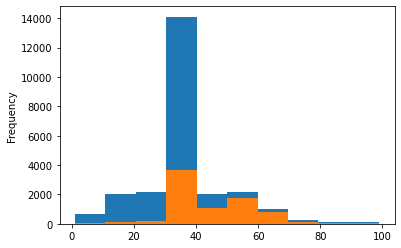

In [25]:
CensusImp1[CensusImp1["Salary"] == " <=50K"]["Hours-Per-Week"].plot.hist()
CensusImp1[CensusImp1["Salary"] == " >50K"]["Hours-Per-Week"].plot.hist()


<AxesSubplot:ylabel='Occupation'>

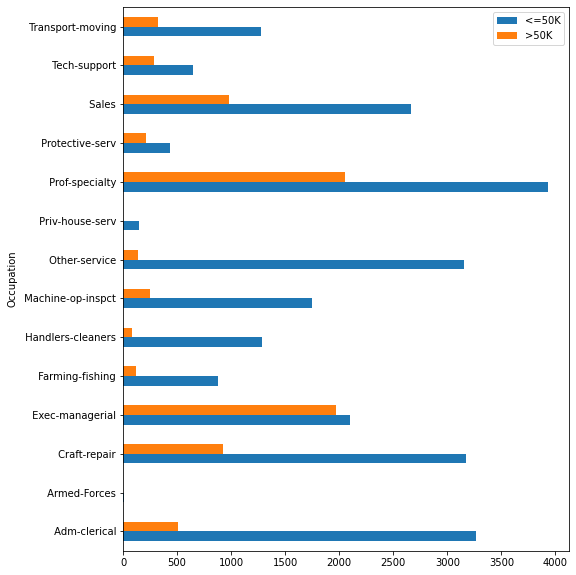

In [26]:
salaryVSEducation=pd.DataFrame([CensusImp1[CensusImp1["Salary"] == " <=50K"].groupby("Occupation")["Occupation"].count(),CensusImp1[CensusImp1["Salary"] == " >50K"].groupby("Occupation")["Occupation"].count()])
salaryVSEducation=salaryVSEducation.transpose()
salaryVSEducation.columns=["<=50K",">50K"]
salaryVSEducation.plot.barh(rot=0,figsize=(8,10))

array([<AxesSubplot:ylabel='<=50K'>, <AxesSubplot:ylabel='>50K'>],
      dtype=object)

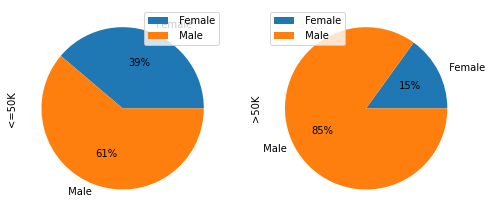

In [27]:
salaryVSEducation=pd.DataFrame([CensusImp1[CensusImp1["Salary"] == " <=50K"].groupby("Sex")["Sex"].count(),CensusImp1[CensusImp1["Salary"] == " >50K"].groupby("Sex")["Sex"].count()])
salaryVSEducation=salaryVSEducation.transpose()
salaryVSEducation.columns=["<=50K",">50K"]
salaryVSEducation.plot.pie(rot=0,figsize=(8,10),subplots=True,autopct="%1.0f%%")

array([<AxesSubplot:ylabel='<=50K'>, <AxesSubplot:ylabel='>50K'>],
      dtype=object)

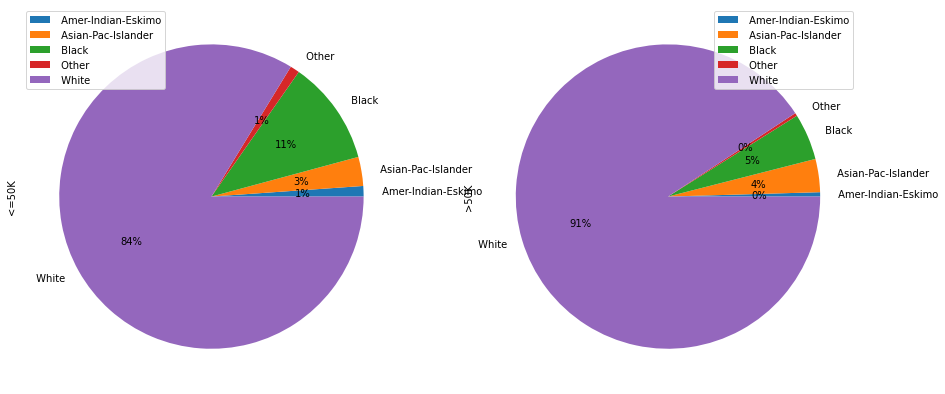

In [28]:
salaryVSEducation=pd.DataFrame([CensusImp1[CensusImp1["Salary"] == " <=50K"].groupby("Race")["Race"].count(),CensusImp1[CensusImp1["Salary"] == " >50K"].groupby("Race")["Race"].count()])
salaryVSEducation=salaryVSEducation.transpose()
salaryVSEducation.columns=["<=50K",">50K"]
salaryVSEducation.plot.pie(rot=0,figsize=(15,20),subplots=True,autopct="%1.0f%%")